In [ ]:
from pandas import read_csv, concat, DataFrame, Series
from matplotlib.pyplot import figure, show
from library.dslabs_functions import plot_bar_chart
from sklearn.model_selection import train_test_split

target = "CovidPos"
original: DataFrame = read_csv(f"./class_covid_pos_scaled_minmax.csv", sep=",", decimal=".")
#original.drop('Unnamed: 0', axis=1, inplace=True) -> if error uncomment this line

# Split the DataFrame into train and test
train, test = train_test_split(original, test_size=0.3, random_state=42)

#Balance the train df keep test df
target_count: Series = train[target].value_counts()
positive_class = target_count.idxmin()
negative_class = target_count.idxmax()

values: dict[str, list] = {
    "Original": [target_count[positive_class], target_count[negative_class]]
}

figure()
plot_bar_chart(
    target_count.index.to_list(), target_count.to_list(), title="Class balance"
)
show()
original.head()

In [36]:
df_positives: Series = train[train[target] == positive_class]
df_negatives: Series = train[train[target] == negative_class]

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",HadDiabetes_Unknown,distance_to_Q1,distance_to_Q2,distance_to_Q3,distance_to_Q4,quadrant_sin,quadrant_cos,CovidPos
18272,1.0,0.000000,0.666667,0.190476,0.0,0.0,0.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.514673,0.472337,0.558610,0.541015,0.5,0.0,1
121930,0.0,0.666667,0.000000,0.000000,1.0,1.0,0.25,0.5,1.0,0.0,...,0.0,0.0,0.0,0.534843,0.672797,0.532060,0.354658,0.0,0.5,1
130840,1.0,1.000000,0.000000,0.000000,1.0,1.0,0.25,0.5,0.0,0.0,...,0.0,0.0,0.0,0.393319,0.283159,0.390452,0.661828,0.5,1.0,1
14362,1.0,0.333333,0.000000,0.000000,1.0,1.0,0.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.988713,0.459819,0.035295,0.577918,0.0,0.5,1
210121,0.0,1.000000,0.000000,0.000000,1.0,1.0,0.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.569159,0.312348,0.487571,0.691213,0.5,0.0,1


In [26]:
# Undersampling
file = 'Balacing_Approach1'
df_neg_sample: DataFrame = DataFrame(df_negatives.sample(len(df_positives)))
df_under: DataFrame = concat([df_positives, df_neg_sample], axis=0)
df_under.to_csv(f"./{file}_under.csv")

print("Minority class=", positive_class, ":", len(df_positives))
print("Majority class=", negative_class, ":", len(df_neg_sample))
print("Proportion:", round(len(df_positives) / len(df_neg_sample), 2), ": 1")


Minority class= 1 : 43048
Majority class= 0 : 43048
Proportion: 1.0 : 1


{'GaussianNB': GaussianNB(), 'MultinomialNB': MultinomialNB(), 'BernoulliNB': BernoulliNB()}
{'accuracy': 0.5825710616845543, 'recall': 0.6018923649092103, 'precision': 0.366137671756995, 'auc': 0.5882885197690375, 'f1': 0.45530708922033053}
1
5
10
15
20
25
{'accuracy': 0.5697141679481286, 'recall': 0.5563334062568366, 'precision': 0.34833230600643794, 'auc': 0.5657546035637347, 'f1': 0.4284210082971823}


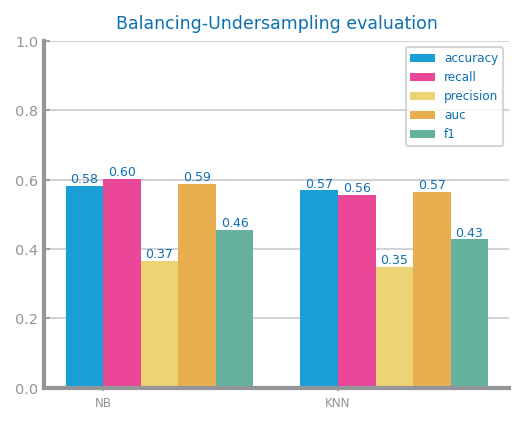

In [28]:
# Evaluation Approach#1
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from library.dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_KNN,run_NB
from sklearn.model_selection import train_test_split

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "CovidPos"
file_tag = "Balancing-Undersampling"

figure()
eval: dict[str, list] = evaluate_approach(df_under, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"./{file_tag}_eval.png")
show()

In [31]:
#OverSampling
df_pos_sample: DataFrame = DataFrame(
    df_positives.sample(len(df_negatives), replace=True)
)
df_over: DataFrame = concat([df_pos_sample, df_negatives], axis=0)
df_over.to_csv(f"./{file}_over.csv")

print("Minority class=", positive_class, ":", len(df_pos_sample))
print("Majority class=", negative_class, ":", len(df_negatives))
print("Proportion:", round(len(df_pos_sample) / len(df_negatives), 2), ": 1")

Minority class= 1 : 104134
Majority class= 0 : 104134
Proportion: 1.0 : 1


{'GaussianNB': GaussianNB(), 'MultinomialNB': MultinomialNB(), 'BernoulliNB': BernoulliNB()}
{'accuracy': 0.5826820336403558, 'recall': 0.5994858893021221, 'precision': 0.365830051398438, 'auc': 0.5876545419275429, 'f1': 0.45437963769017126}
1
5
10
15
20
25
{'accuracy': 0.5650216395313813, 'recall': 0.5263618464231021, 'precision': 0.3388493768044504, 'auc': 0.5535816375769936, 'f1': 0.4122863385169001}


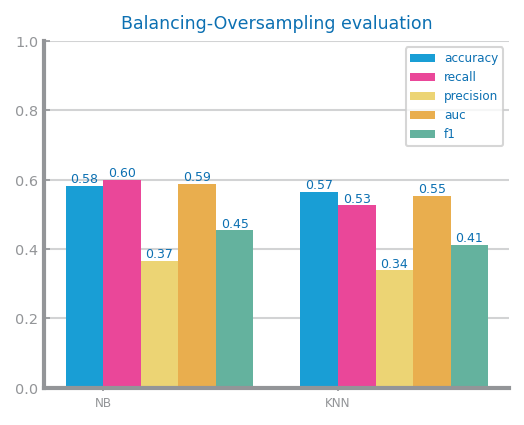

In [32]:
# Evaluation Approach #2
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from library.dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_KNN,run_NB
from sklearn.model_selection import train_test_split

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "CovidPos"
file_tag = "Balancing-Oversampling"

figure()
eval: dict[str, list] = evaluate_approach(df_over, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"./{file_tag}_eval.png")
show()

In [37]:
from numpy import ndarray
from pandas import Series
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42

smote: SMOTE = SMOTE(sampling_strategy="minority", random_state=RANDOM_STATE)
y = train.pop(target).values
X: ndarray = train.values
smote_X, smote_y = smote.fit_resample(X, y)
df_smote: DataFrame = concat([DataFrame(smote_X), DataFrame(smote_y)], axis=1)
df_smote.columns = list(train.columns) + [target]
df_smote.to_csv(f"./{file}_smote.csv")

smote_target_count: Series = Series(smote_y).value_counts()
print("Minority class=", positive_class, ":", smote_target_count[positive_class])
print("Majority class=", negative_class, ":", smote_target_count[negative_class])
print(
    "Proportion:",
    round(smote_target_count[positive_class] / smote_target_count[negative_class], 2),
    ": 1",
)
print(df_smote.shape)

Minority class= 1 : 104134
Majority class= 0 : 104134
Proportion: 1.0 : 1
(208268, 58)


{'GaussianNB': GaussianNB(), 'MultinomialNB': MultinomialNB(), 'BernoulliNB': BernoulliNB()}
{'accuracy': 0.46560662026982036, 'recall': 0.7204112885583024, 'precision': 0.31535349182408007, 'auc': 0.5410070730100364, 'f1': 0.43867916673604984}
1
5
10
15
20
25
{'accuracy': 0.4938569095895623, 'recall': 0.6826733756289652, 'precision': 0.3233092444375372, 'auc': 0.5497304817647002, 'f1': 0.43880402875674535}


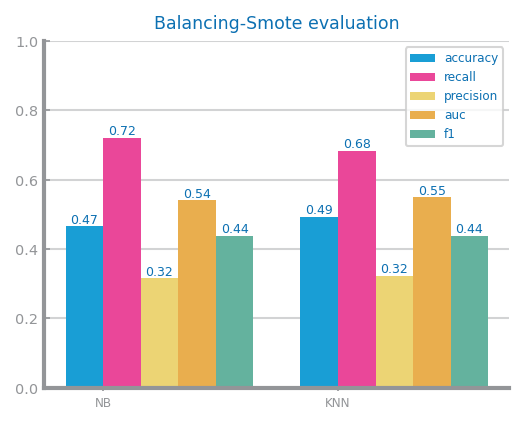

In [38]:
# Evaluation Approach#3
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from library.dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_KNN,run_NB
from sklearn.model_selection import train_test_split

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "CovidPos"
file_tag = "Balancing-Smote"

figure()
eval: dict[str, list] = evaluate_approach(df_smote, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"./{file_tag}_eval.png")
show()